In [1]:
import pandas as pd
import numpy as np

In [2]:
# Загрузите данные из CSV-файла в DataFrame
data = pd.read_csv('sales_inventory_orders_data.csv')

In [3]:
# Выберем один продукт для анализа, например:
selected_product = 'Product_7'
product_data = data[data['Product'] == selected_product]

In [ ]:
# Модель EOQ

In [4]:
# Рассчитаем средний уровень продаж и средний уровень инвентаря для выбранного продукта.
average_sales = product_data['Sales'].mean()
average_inventory = product_data['Inventory'].mean()

In [5]:
print(average_sales)
print(average_inventory)

14.394520547945206
80.97260273972603


In [6]:
# Параметры для расчета EOQ
holding_cost = 0.10  # Затраты на хранение
ordering_cost = 50   # Затраты на заказ
demand_rate = average_sales  # Скорость спроса

# Расчет EOQ
EOQ = np.sqrt((2 * ordering_cost * demand_rate) / holding_cost)

print(f'Модель экономического заказа (EOQ) для продукта {selected_product}')
print(f'EOQ: {EOQ:.2f} (оптимальный размер заказа)')

Модель экономического заказа (EOQ) для продукта Product_7
EOQ: 119.98 (оптимальный размер заказа)


In [ ]:
# Модель ROP

In [7]:
# Рассчитаем средний уровень продаж, средний уровень инвентаря и стандартное отклонение продаж для выбранного продукта.
average_sales = product_data['Sales'].mean()
average_inventory = product_data['Inventory'].mean()
std_deviation_sales = product_data['Sales'].std()

In [8]:
print(average_sales)
print(average_inventory)
print(std_deviation_sales)

14.394520547945206
80.97260273972603
5.935826465386815


In [9]:
# Параметры для расчета ROP
service_level = 0.95  # Уровень сервиса (вероятность удовлетворения спроса)
z_score = 1.645  # Значение Z-критерия для уровня сервиса 95%

In [10]:
# Расчет ROP
ROP = (average_sales * z_score) + (std_deviation_sales * z_score) - average_inventory

print(f'Модель точки заказа (ROP) для продукта {selected_product}')
print(f'ROP: {ROP:.2f} (уровень инвентаря, при достижении которого нужно делать заказ)')

Модель точки заказа (ROP) для продукта Product_7
ROP: -47.53 (уровень инвентаря, при достижении которого нужно делать заказ)


In [14]:
# Отрицательные значения указывают что уровень инвентаря превышает уровень продаж, и заказ не требуется.

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
# Выберем один продукт для анализа, например:
selected_product = 'Product_8'
product_data = data[data['Product'] == selected_product]

In [13]:
# Прогнозирование продаж с использованием экспоненциального сглаживания
model = ExponentialSmoothing(product_data['Sales'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()
sales_forecast = model_fit.forecast(steps=len(product_data))

D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
# Прогнозирование продаж с использованием метода скользящего среднего
rolling_mean = product_data['Sales'].rolling(window=7).mean()
rolling_mean = rolling_mean.fillna(0)  # Заполнение NaN начальными значениями

In [15]:
# Прогнозирование продаж с использованием ARIMA
model = ARIMA(product_data['Sales'], order=(1, 1, 1))
model_fit = model.fit()
sales_forecast_arima = model_fit.forecast(steps=len(product_data))

D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
# Оценка качества прогнозов
mae = mean_absolute_error(product_data['Sales'], sales_forecast)
mse = mean_squared_error(product_data['Sales'], sales_forecast)

print(f'Метрики прогнозирования для продукта {selected_product}:')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

Метрики прогнозирования для продукта Product_8:
MAE: 5.23
MSE: 41.33


In [17]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [23]:
# Выберем один продукт для анализа, например:
selected_product = 'Product_8'
product_data = data[data['Product'] == selected_product]

In [24]:
# Выберем столбцы с датой и продажами
product_data = product_data[['Date', 'Sales']]

# Преобразуем столбец с датой в формат времени
product_data['Date'] = pd.to_datetime(product_data['Date'])

# Установим дату как индекс
product_data.set_index('Date', inplace=True)

In [25]:
# Разделение данных на обучающую и тестовую выборки
train_data = product_data['Sales'][:len(product_data) - 30]  # Последние 30 точек данных для теста
test_data = product_data['Sales'][len(product_data) - 30:]

In [26]:
# Применение SARIMAX модели
model = sm.tsa.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\1. SOFT\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


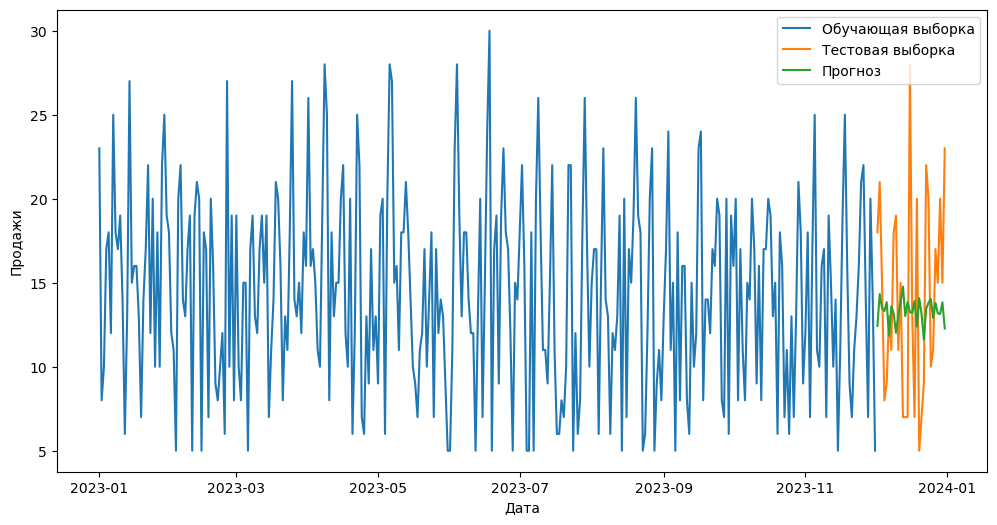

In [27]:
# Прогноз на основе модели
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Обучающая выборка')
plt.plot(test_data, label='Тестовая выборка')
plt.plot(forecast, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()